In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
# Update rc parameters to use LaTeX
plt.rcParams.update({
    "text.usetex": True,            # Use LaTeX for text rendering
    "font.family": "serif",         # Use a serif font
    "font.serif": ["Computer Modern"],  # Use the Computer Modern font (default for LaTeX)
    "text.latex.preamble": r"\usepackage{amsmath}"  # Load additional LaTeX packages if needed
})

import seaborn as sns 
sns.set_theme('paper')

import tikzplotlib as tpl

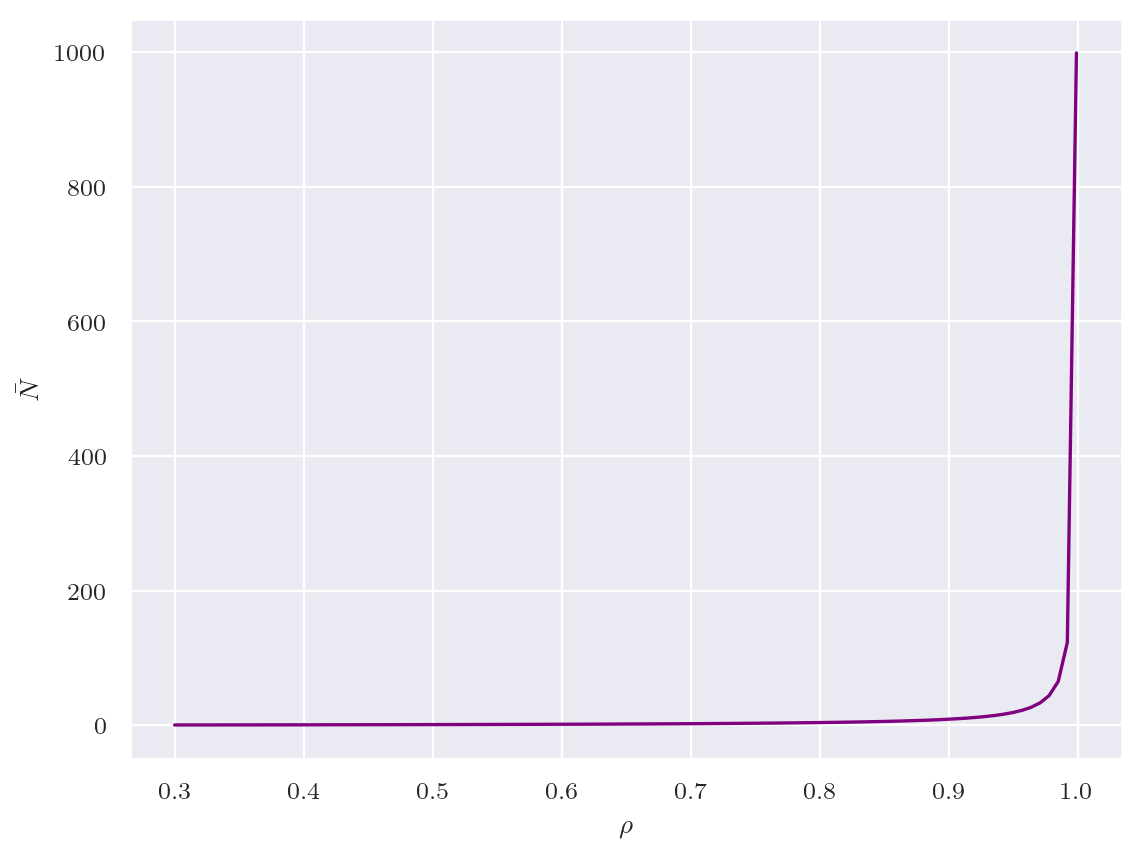

In [2]:
x = np.linspace(0.3, 0.999, 100)
y1 = x / (1 - x)
y2 = x / ((1 - x) ** 2)
fig, axes = plt.subplots()
axes.plot(x, y1, color='purple')
axes.set_xlabel(r'$\rho$')
axes.set_ylabel(r'$\bar{N}$')
plt.savefig('avg_mm1.pdf')
plt.savefig('avg_mm1.svg', transparent=True)

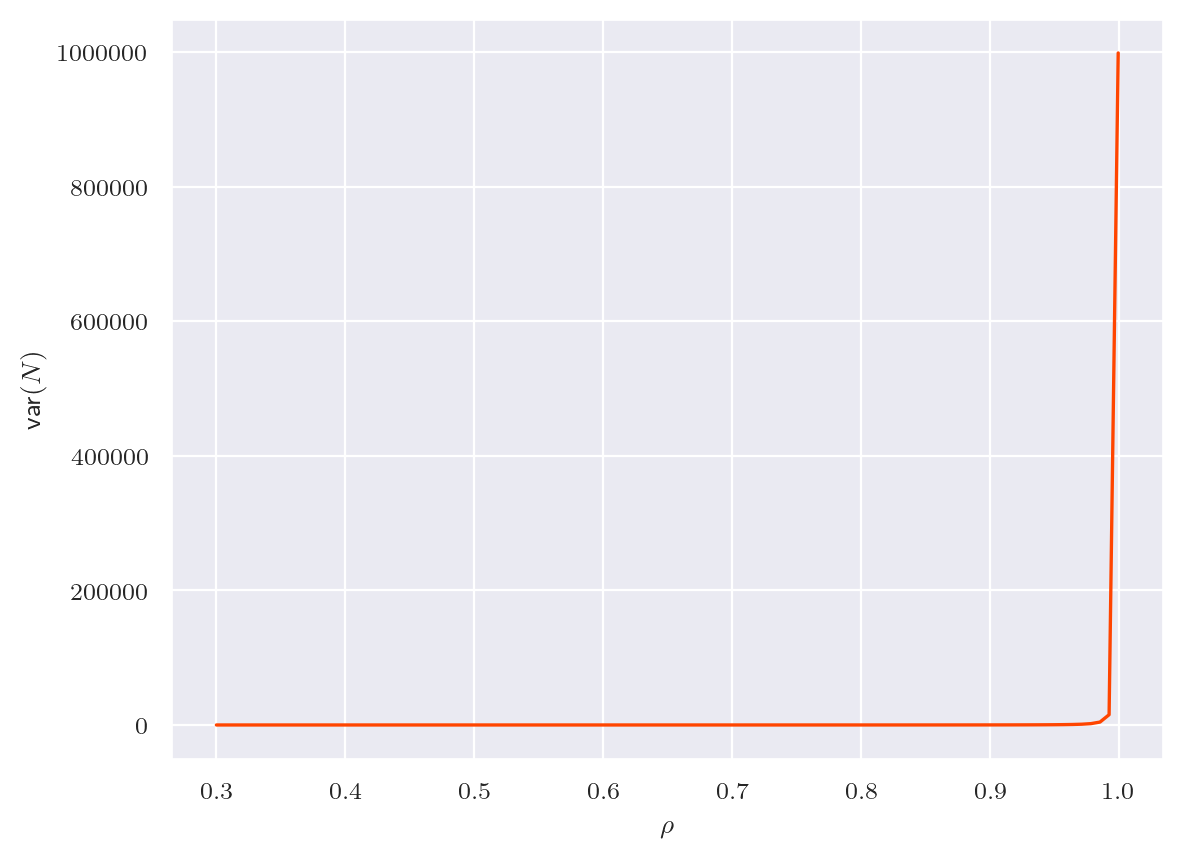

In [3]:
fig, axes = plt.subplots()
axes.plot(x, y2, color='orangered')
axes.set_xlabel(r'$\rho$')
axes.set_ylabel(r'$\text{var}(N)$')
plt.savefig('var_mm1.pdf')

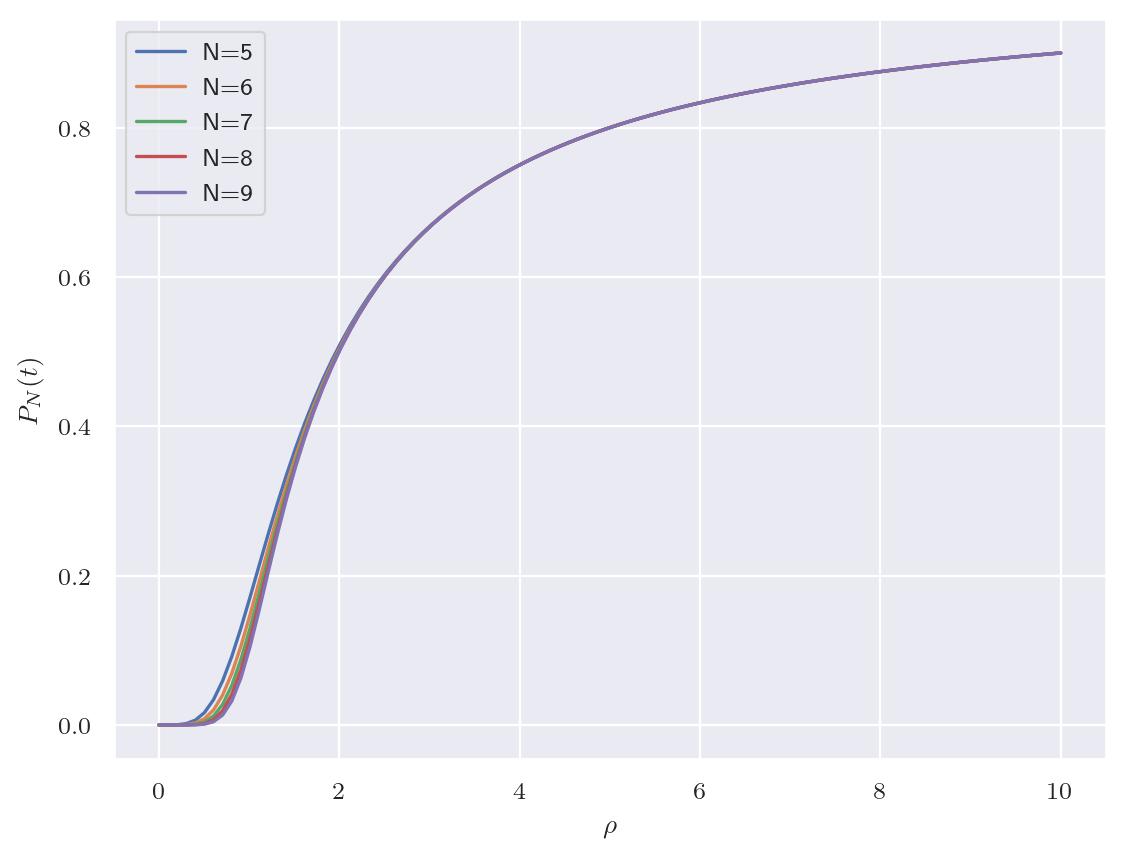

In [4]:
# Fixing N, varying rho:
x = np.linspace(0, 10, 100)
Y = [(x ** N) * (1 - x) / (1 - (x ** (N + 1))) for N in range(5, 10)]

fig, axes = plt.subplots()
for i, y in enumerate(Y):
    axes.plot(x, y, label=f'N={5+i}')
axes.set_xlabel(r'$\rho$')
axes.set_ylabel(r'$P_N(t)$')
axes.legend()
plt.savefig('blockProb_Nfix.pdf')

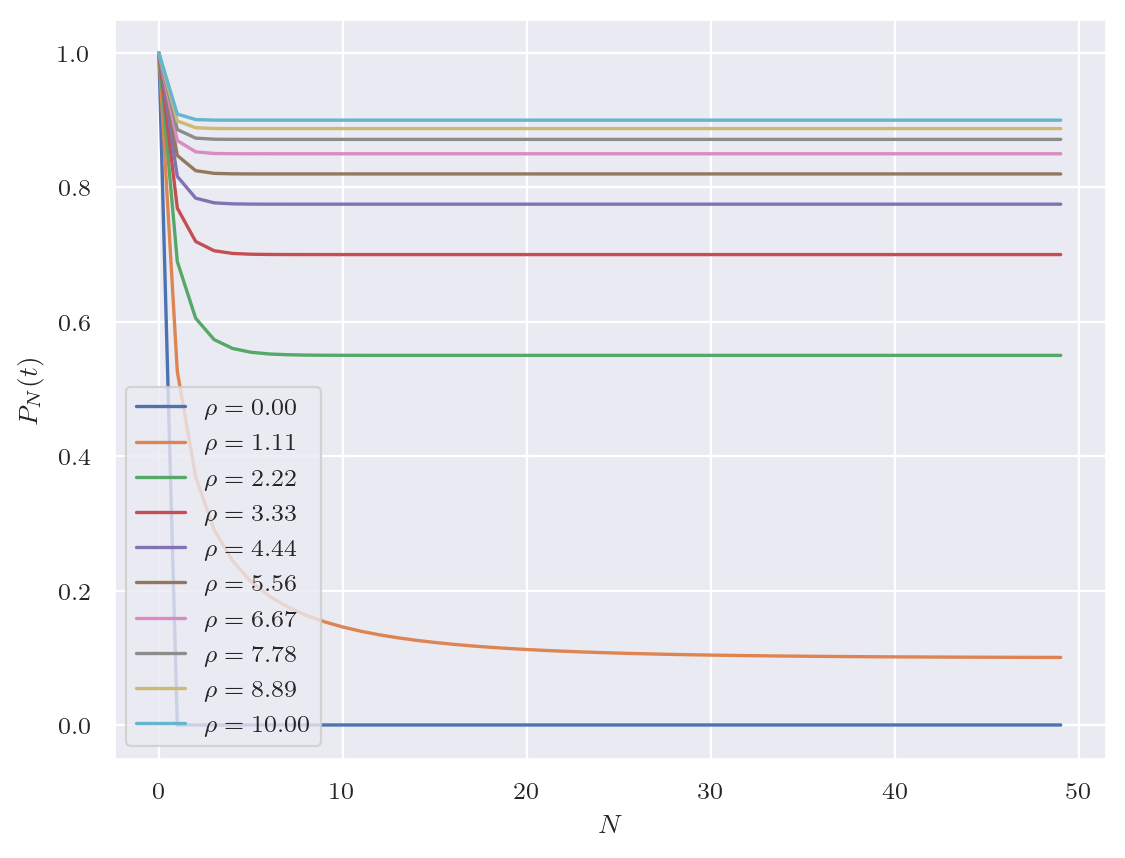

In [5]:
# Fixing rho, varying N:
x = np.arange(50)
Y = [(rho ** x) * (1 - rho) / (1 - (rho ** (x + 1))) for rho in np.linspace(0, 10, 10)]
rhos = np.linspace(0, 10, 10)
fig, axes = plt.subplots()
for i, y in enumerate(Y):
    axes.plot(x, y, label=fr'$\rho={rhos[i]:.2f}$')
axes.set_xlabel(r'$N$')
axes.set_ylabel(r'$P_N(t)$')
axes.legend()
plt.savefig('blockProb_rhofix.pdf')

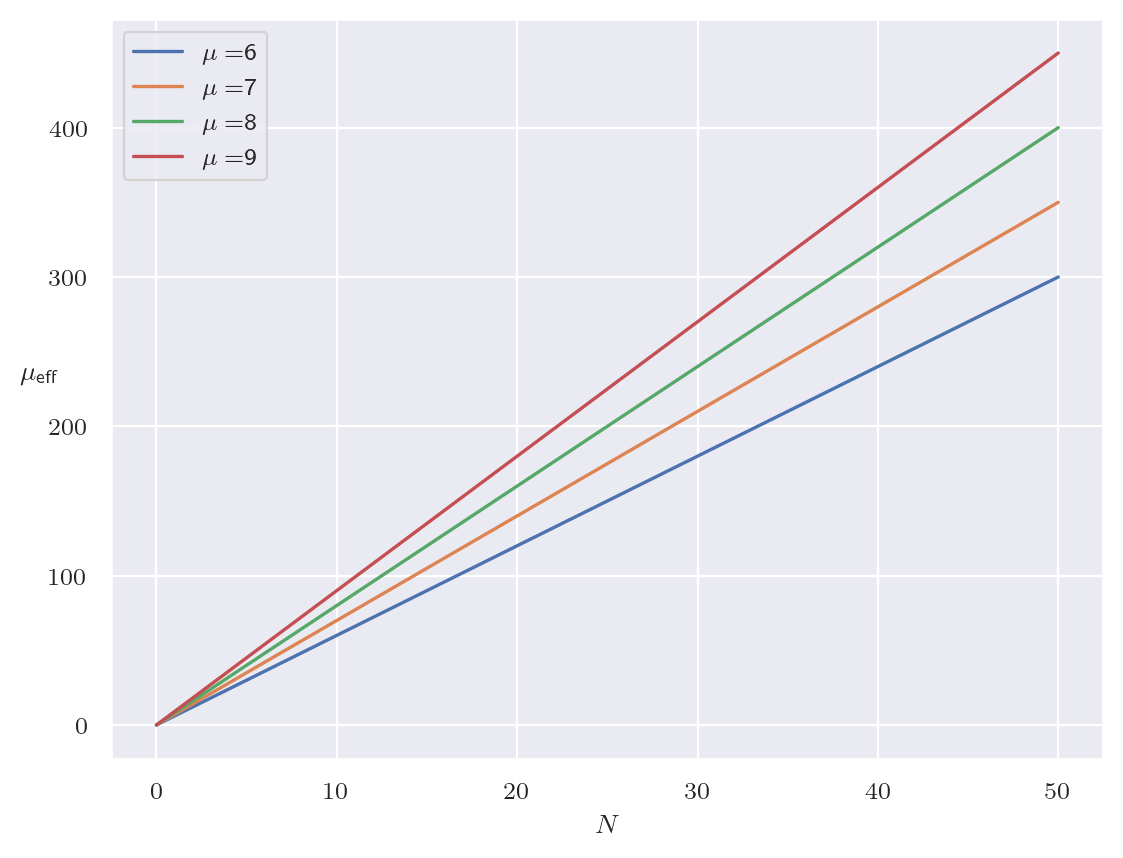

In [6]:
x = np.linspace(0, 50, 10)
y = [i * x for i in range(6, 10)]

mu = 6
fig, axes = plt.subplots()
for i in range(len(y)):
    axes.plot(x, y[i], label=f'$\mu = ${mu}')
    mu += 1
axes.set_xlabel(f'$N$')
axes.set_ylabel(r'$\mu_{\text{eff}}$', rotation=0)
axes.legend()
fig.savefig(f'mmInf_output_rate.svg', transparent=True)
fig.savefig(f'mmInf_output_rate.pdf')

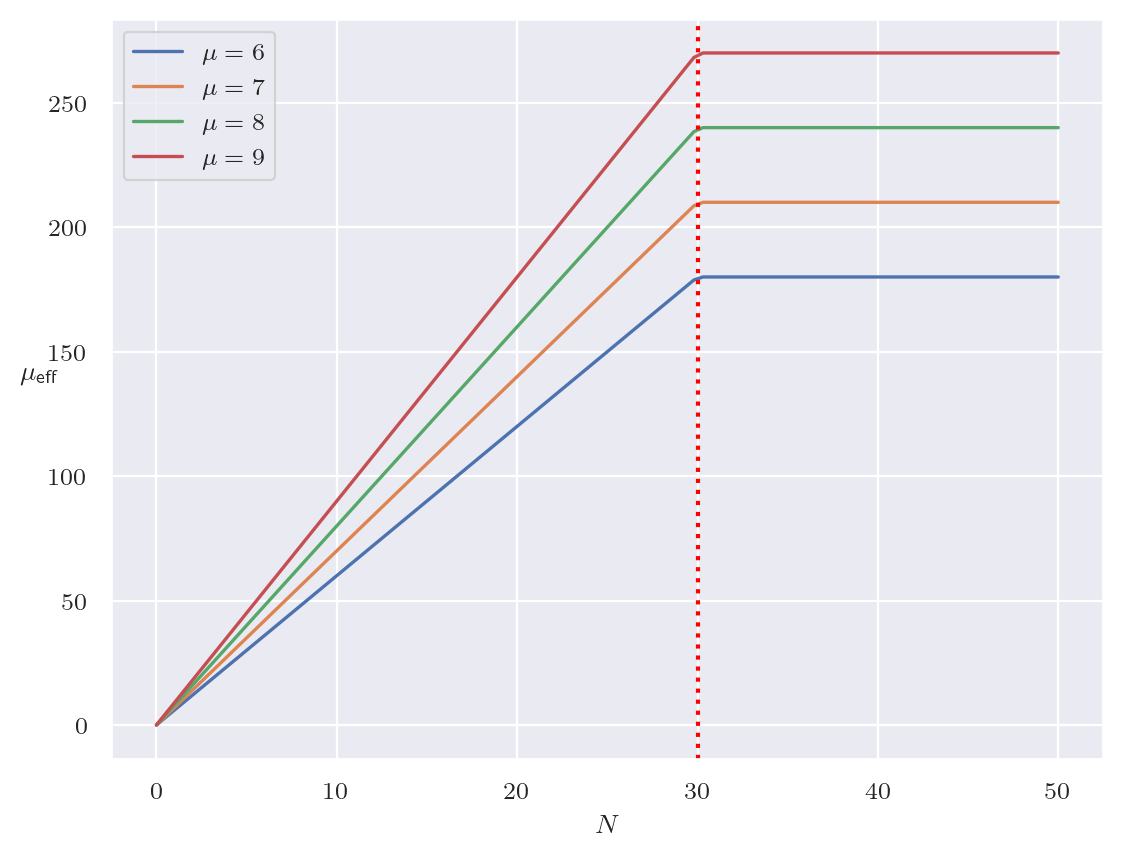

In [7]:
# Parameters
x = np.linspace(0, 50, 100)  # Number of customers
m = 30                       # Maximum number of servers
service_rates = range(6, 10) # Different values of μ

# Plot
fig, axes = plt.subplots()
for mu in service_rates:
    # Calculate effective service rate, capped at m * mu
    y = np.minimum(mu * x, m * mu)
    axes.plot(x, y, label=f'$\mu = {mu}$')

# Add a vertical dotted line at N = 30
axes.axvline(x=30, color='red', linestyle=':', linewidth=1.5)

# Labels and legend
axes.set_xlabel(r'$N$')  # Number of customers
axes.set_ylabel(r'$\mu_{\text{eff}}$', rotation=0)  # Effective service rate
axes.legend()
fig.savefig('mmm_output_rate.svg', transparent=True)
fig.savefig('mmm_output_rate.pdf' )